In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats
import pingouin as pg

df = pd.read_csv('final_games-3.csv')

Посмотрим на данные

In [3]:
df.head()

,Game_ID,Rated,Variant,Speed,Created_At,Last_Move_At,Game_Status,Source,Winner,Opening_Name,...,Black_Inaccuracy,Black_Mistake,Black_Blunder,Black_ACPL,Clocks,Analysis,Total_Time_Init,Total_Time_Increment,Total_Time,Moves
0,PsevV6VH,True,standard,classical,2024-12-15T11:09:25.224000+00:00,2024-12-15T11:55:14.775000+00:00,resign,pool,white,English Opening: Symmetrical Variation,...,5,1,1,47,"[180003, 180003, 178499, 178019, 178339, 17757...","[{'eval': 14}, {'eval': 25}, {'eval': 26}, {'e...",1800,0,1800,Nf3 c5 c4 Nc6 Nc3 g6 e3 Bg7 d4 cxd4 exd4 d6 h3...
1,diLZa8sj,True,standard,classical,2024-10-28T13:54:16.605000+00:00,2024-10-28T14:32:21.403000+00:00,resign,pool,white,"French Defense: Winawer Variation, Advance Var...",...,4,0,1,31,"[180003, 180003, 179827, 179683, 178619, 17936...","[{'eval': 18}, {'eval': 28}, {'eval': 28}, {'e...",1800,0,1800,e4 e6 d4 d5 Nc3 Bb4 e5 Ne7 a3 Bxc3+ bxc3 b6 Bb...
2,O8TSZ7bq,True,standard,classical,2024-10-05T13:58:55.992000+00:00,2024-10-05T14:27:57.120000+00:00,resign,pool,black,London System,...,3,1,5,56,"[180003, 180003, 179707, 179035, 179051, 17678...","[{'eval': 17}, {'eval': 17}, {'eval': 11}, {'e...",1800,0,1800,d4 Nf6 Nf3 g6 Bf4 Bg7 e3 d6 Be2 O-O O-O Nbd7 h...
3,vtMjWIUv,True,standard,classical,2024-08-23T07:33:49.932000+00:00,2024-08-23T08:04:22.421000+00:00,resign,pool,white,"King's Indian Defense: Orthodox Variation, Pos...",...,5,1,2,42,"[180003, 180003, 179731, 179283, 179443, 17872...","[{'eval': 16}, {'eval': 17}, {'eval': 15}, {'e...",1800,0,1800,d4 Nf6 Nf3 d6 c4 g6 Nc3 Bg7 e4 O-O Be2 Nbd7 O-...
4,GC8I3jiq,True,standard,classical,2024-08-22T13:24:49.024000+00:00,2024-08-22T14:18:09.814000+00:00,draw,pool,NaN,"English Opening: Anglo-Indian Defense, King's ...",...,5,1,2,26,"[180003, 180003, 179867, 178467, 175067, 17782...","[{'eval': 17}, {'eval': 18}, {'eval': 23}, {'e...",1800,0,1800,Nf3 Nf6 c4 c5 g3 g6 b3 Bg7 Bb2 O-O Bg2 Nc6 O-O...


Оставим только исследуемые колонки

In [4]:
columns_for_eda = [
    'Game_ID', 'Rated', 'White_Rating',
    'Black_Rating', 'White_Inaccuracy', 'Black_Inaccuracy',
    'Opening_Name', 'Clocks'
]

In [5]:
df_filtered = df.filter(items=columns_for_eda)

Постороим корреляционную матрицу

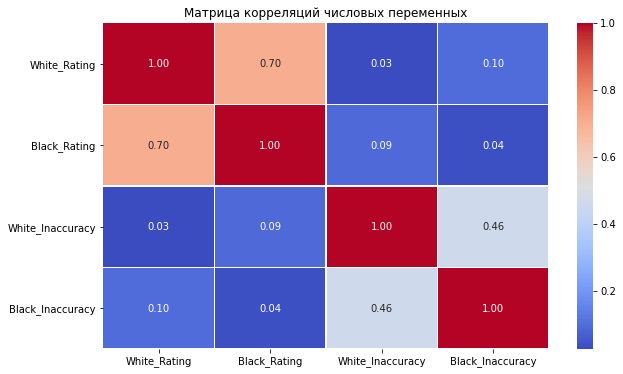

In [6]:
correlation_matrix = df_filtered.filter(items=columns_for_eda).select_dtypes(include=[np.number]).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f",
            cmap="coolwarm", linewidths=0.5)
plt.title("Матрица корреляций числовых переменных")
plt.show()

Проверяем типы данных в колонках

In [7]:
df_filtered.dtypes

Game_ID              object
Rated                  bool
White_Rating        float64
Black_Rating        float64
White_Inaccuracy      int64
Black_Inaccuracy      int64
Opening_Name         object
Clocks               object
dtype: object

Проверяем пропуски в данных

In [8]:
print(df_filtered.isnull().sum())

Game_ID                0
Rated                  0
White_Rating         227
Black_Rating         311
White_Inaccuracy       0
Black_Inaccuracy       0
Opening_Name        1270
Clocks                 0
dtype: int64


Разбираемся с колонкой White_Rating

In [9]:
df_filtered['White_Rating'].describe()
# предлагаю заменить пропуски рейтинга на среднее

count    140565.000000
mean       2548.521766
std         360.134879
min         455.000000
25%        2294.000000
50%        2591.000000
75%        2808.000000
max        3438.000000
Name: White_Rating, dtype: float64

In [10]:
# Вычисление среднего значения для колонки 
mean_A = df['White_Rating'].mean()

# Замена пропусков в колонке 'A' на среднее значение
df_filtered['White_Rating'].fillna(mean_A, inplace=True)

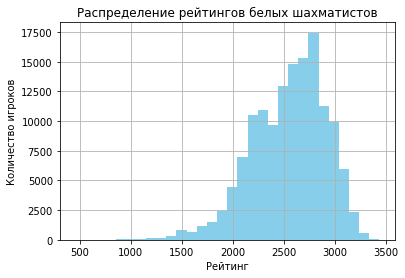

In [11]:
# Построение гистограммы для колонки 'White_Rating'
plt.hist(df_filtered['White_Rating'], bins=30, color='skyblue')
plt.title('Распределение рейтингов белых шахматистов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество игроков')
plt.grid(True)

# Отображение графика
plt.show()

Посмотрим выбросы в колонке White_Rating

In [12]:
# Вычисление квартиля
Q1 = df_filtered['White_Rating'].quantile(0.25)
Q3 = df_filtered['White_Rating'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выявления выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Поиск выбросов
outliers_wr = df_filtered[(df_filtered['White_Rating'] < lower_bound) | (df_filtered['White_Rating'] > upper_bound)]

# Выводим только колонку с выбросами
outlier_column = outliers_wr['White_Rating']
print(outlier_column)

208       1442.0
332       1435.0
416       1061.0
417        920.0
424       1198.0
           ...  
140721    1500.0
140749    1380.0
140752    1470.0
140778    1200.0
140790    1309.0
Name: White_Rating, Length: 1451, dtype: float64


Разбираемся с колонкой Black_Rating

In [13]:
df_filtered['Black_Rating'].describe()
# предлагаю заменить пропуски рейтинга на среднее

count    140481.000000
mean       2549.812081
std         358.765826
min         458.000000
25%        2296.000000
50%        2591.000000
75%        2808.000000
max        3441.000000
Name: Black_Rating, dtype: float64

In [14]:
# Вычисление среднего значения для колонки 
mean_B = df_filtered['Black_Rating'].mean()

# Замена пропусков в колонке 'A' на среднее значение
df_filtered['Black_Rating'].fillna(mean_B, inplace=True)

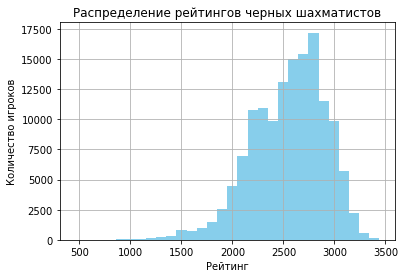

In [15]:
# Построение гистограммы для колонки 'Black_Rating'
plt.hist(df_filtered['Black_Rating'], bins=30, color='skyblue')
plt.title('Распределение рейтингов черных шахматистов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество игроков')
plt.grid(True)

# Отображение графика
plt.show()

Посмотрим выбросы в колонке Black_Rating'

In [16]:
# Вычисление квартиля
Q1 = df_filtered['Black_Rating'].quantile(0.25)
Q3 = df_filtered['Black_Rating'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выявления выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Поиск выбросов
outliers_br = df_filtered[(df_filtered['Black_Rating'] < lower_bound) | (df_filtered['Black_Rating'] > upper_bound)]

# Выводим только колонку с выбросами
outlier_column = outliers_br['Black_Rating']
print(outlier_column)

207       1495.0
333       1081.0
423       1476.0
1062      1038.0
1137      1309.0
           ...  
140722    1497.0
140779    1382.0
140785    1339.0
140789    1468.0
140791    1500.0
Name: Black_Rating, Length: 1526, dtype: float64


Разбираемся с колонкой White_Inaccuracy - количество неточностей, допущенных белым игроком

In [17]:
df_filtered['White_Inaccuracy'].describe()

count    140792.000000
mean          2.937937
std           2.278716
min           0.000000
25%           1.000000
50%           3.000000
75%           4.000000
max          41.000000
Name: White_Inaccuracy, dtype: float64

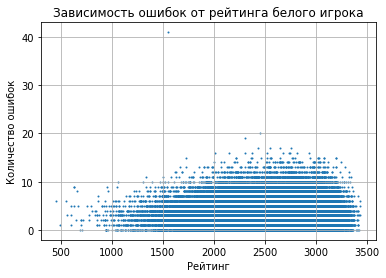

In [18]:
# Построение диаграммы рассеяния
plt.scatter(df_filtered['White_Rating'], df_filtered['White_Inaccuracy'], s=1)

plt.title('Зависимость ошибок от рейтинга белого игрока')
plt.xlabel('Рейтинг')
plt.ylabel('Количество ошибок')
plt.grid(True)

plt.show()

Посмотрим как распределились неточности белого игрока по количеству игр

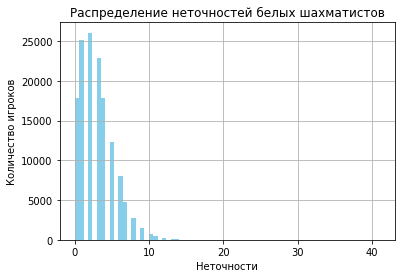

In [19]:
# Построение гистограммы для колонки 'White_Inaccuracy'
plt.hist(df_filtered['White_Inaccuracy'], bins=70, color='skyblue')
plt.title('Распределение неточностей белых шахматистов')
plt.xlabel('Неточности')
plt.ylabel('Количество игроков')
plt.grid(True)

# Отображение графика
plt.show()

Определение выбросов в колонке White_Inaccuracy

In [20]:
# Вычисление квартиля
Q1 = df_filtered['White_Inaccuracy'].quantile(0.25)
Q3 = df_filtered['White_Inaccuracy'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выявления выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Поиск выбросов
outliers_white = df_filtered[
    (df_filtered['White_Inaccuracy'] < lower_bound) |
    (df_filtered['White_Inaccuracy'] > upper_bound)]
# Выводим только колонку с выбросами
outlier_column = outliers_white['White_Inaccuracy']
print(outlier_column)

41        16
47         9
100       14
108        9
128       10
          ..
140650    11
140684     9
140722    12
140732    10
140759    11
Name: White_Inaccuracy, Length: 3108, dtype: int64


Разбираемся с колонкой Black_Inaccuracy - количество неточностей, допущенных черным игроком

In [21]:
df_filtered['Black_Inaccuracy'].describe()

count    140792.000000
mean          2.968869
std           2.263913
min           0.000000
25%           1.000000
50%           3.000000
75%           4.000000
max          45.000000
Name: Black_Inaccuracy, dtype: float64

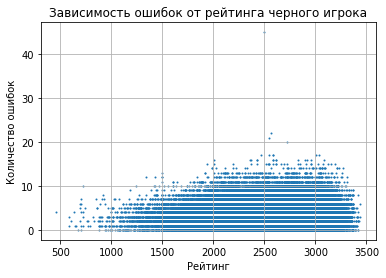

In [22]:
# Построение диаграммы рассеяния
plt.scatter(df_filtered['Black_Rating'], df_filtered['Black_Inaccuracy'], s=1)

plt.title('Зависимость ошибок от рейтинга черного игрока')
plt.xlabel('Рейтинг')
plt.ylabel('Количество ошибок')
plt.grid(True)

plt.show()

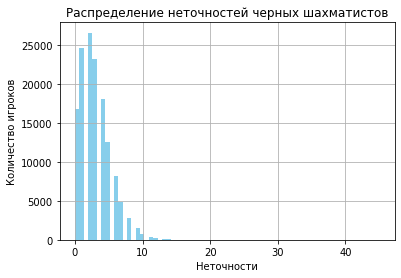

In [23]:
# Построение гистограммы для колонки 'Black_Inaccuracy'
plt.hist(df_filtered['Black_Inaccuracy'], bins=70, color='skyblue')
plt.title('Распределение неточностей черных шахматистов')
plt.xlabel('Неточности')
plt.ylabel('Количество игроков')
plt.grid(True)

# Отображение графика
plt.show()

In [ ]:
df_filtered['Black_Inaccuracy_log'] = np.log1p(df_filtered['Black_Inaccuracy'])

In [ ]:
# Построение гистограммы для колонки 'Black_Inaccuracy'
plt.hist(df_filtered['Black_Inaccuracy_log'], bins=70, color='skyblue')
plt.title('Распределение неточностей черных шахматистов')
plt.xlabel('Неточности')
plt.ylabel('Количество игроков')
plt.grid(True)

# Отображение графика
plt.show()

Определение выбросов в колонке Black_Inaccuracy

In [24]:
# Вычисление квартиля
Q1 = df_filtered['Black_Inaccuracy'].quantile(0.25)
Q3 = df_filtered['Black_Inaccuracy'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ для выявления выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Поиск выбросов
outliers_black = df_filtered[(df_filtered['Black_Inaccuracy'] < lower_bound) | (df_filtered['Black_Inaccuracy'] > upper_bound)]

# Выводим только колонку с выбросами
outlier_column = outliers_black['Black_Inaccuracy']
print(outlier_column)

33         9
41        13
100       11
124       10
153       11
          ..
140616    12
140650    11
140693     9
140713    10
140724    10
Name: Black_Inaccuracy, Length: 3048, dtype: int64


Посмотрим на колонку Rated - улевый признак, показывающий, является ли партия рейтинговой (True) или нет (False) 

In [25]:
df_filtered['Rated'].value_counts()

True     134761
False      6031
Name: Rated, dtype: int64

Посмотрим на колонку Opening_Name - название дебюта, который был сыгран

In [26]:
df_filtered['Opening_Name'].value_counts()

Indian Defense                                                        1891
Sicilian Defense: Closed                                              1569
Zukertort Opening                                                     1280
King's Indian Attack                                                  1267
Modern Defense                                                        1185
                                                                      ... 
English Opening: Myers Gambit                                            1
Tarrasch Defense: Rubinstein System                                      1
Grünfeld Defense: Exchange Variation, Simagin's Improved Variation       1
Italian Game: Two Knights Defense, Max Lange Attack, Loman Defense       1
Dutch Defense: Classical Variation, Blackburne Attack                    1
Name: Opening_Name, Length: 2318, dtype: int64

Попробуем заменить пропуски в колонке Opening_Name

In [27]:
# Функция для обрезки ходов до нужного количества
def trim_moves(moves, num_moves):
    # Разбиваем строку на отдельные ходы
    move_list = moves.split()
    # Обрезаем до нужного количества ходов
    trimmed_moves = ' '.join(move_list[:num_moves])
    return trimmed_moves

# Применяем функцию к столбцу 'Moves', обрезая до 2-х ходов
df['TrimmedMoves'] = df['Moves'].apply(lambda x: trim_moves(x, 2))  # Обрезаем до 2-х ходов (1 для белых и 1 для черных)

print("\nDataFrame после обрезки ходов:")
print(df)



DataFrame после обрезки ходов:
         Game_ID  Rated   Variant        Speed  \
0       PsevV6VH   True  standard    classical   
1       diLZa8sj   True  standard    classical   
2       O8TSZ7bq   True  standard    classical   
3       vtMjWIUv   True  standard    classical   
4       GC8I3jiq   True  standard    classical   
...          ...    ...       ...          ...   
140787  nFPldl4M   True  standard  ultraBullet   
140788  qjnWre9p   True  standard  ultraBullet   
140789  urNcmiBj   True  standard  ultraBullet   
140790  sVXMAWZV   True  standard  ultraBullet   
140791  Q2mKx3Ra   True  standard  ultraBullet   

                              Created_At                      Last_Move_At  \
0       2024-12-15T11:09:25.224000+00:00  2024-12-15T11:55:14.775000+00:00   
1       2024-10-28T13:54:16.605000+00:00  2024-10-28T14:32:21.403000+00:00   
2       2024-10-05T13:58:55.992000+00:00  2024-10-05T14:27:57.120000+00:00   
3       2024-08-23T07:33:49.932000+00:00  2024-08-23T08

In [28]:
# Создаем словарь из DataFrame
opening_dict = df.set_index('TrimmedMoves')['Opening_Name'].to_dict()

print("\nСловарь дебютов:")
print(opening_dict)


Словарь дебютов:
{'Nf3 c5': 'Zukertort Opening: Sicilian Invitation', 'e4 e6': "French Defense: Queen's Knight", 'd4 Nf6': 'Indian Defense: Normal Variation', 'Nf3 Nf6': "King's Indian Defense: Normal Variation, King's Knight Variation", 'e4 c6': 'Caro-Kann Defense', 'e4 c5': 'Sicilian Defense: Closed', 'e4 e5': "Petrov's Defense: Modern Attack", 'e4 Nc6': 'Nimzowitsch Defense', 'e4 d5': 'Scandinavian Defense: Valencian Variation', 'e4 b6': 'Owen Defense', 'e4 g6': 'Modern Defense: Standard Line', 'e4 d6': 'Rat Defense: Antal Defense', 'd4 d5': 'Slav Defense: Slav Gambit, Alekhine Attack', 'Nf3 d5': 'English Opening: Agincourt Defense, Catalan Defense, Semi-Slav Defense', 'd4 c5': 'Caro-Kann Defense: Exchange Variation', 'c4 e5': 'English Opening: The Whale', 'd4 d6': "Queen's Pawn Game", 'c4 d6': 'English Opening', 'Nf3 g6': 'Zukertort Opening: Kingside Fianchetto', 'Nf3 e6': 'English Opening: Agincourt Defense, Neo-Catalan Declined', 'c4 c6': 'English Opening: Caro-Kann Defensive Sy

In [29]:
# Функция для определения дебюта по обрезанным ходам
def determine_opening(trimmed_moves):
    return opening_dict.get(trimmed_moves, None)

# Заполняем пропуски в столбце 'Opening' на основе обрезанных ходов
df['Opening_Name'] = df['TrimmedMoves'].apply(determine_opening)

print("\nDataFrame после определения дебютов:")
print(df)


DataFrame после определения дебютов:
         Game_ID  Rated   Variant        Speed  \
0       PsevV6VH   True  standard    classical   
1       diLZa8sj   True  standard    classical   
2       O8TSZ7bq   True  standard    classical   
3       vtMjWIUv   True  standard    classical   
4       GC8I3jiq   True  standard    classical   
...          ...    ...       ...          ...   
140787  nFPldl4M   True  standard  ultraBullet   
140788  qjnWre9p   True  standard  ultraBullet   
140789  urNcmiBj   True  standard  ultraBullet   
140790  sVXMAWZV   True  standard  ultraBullet   
140791  Q2mKx3Ra   True  standard  ultraBullet   

                              Created_At                      Last_Move_At  \
0       2024-12-15T11:09:25.224000+00:00  2024-12-15T11:55:14.775000+00:00   
1       2024-10-28T13:54:16.605000+00:00  2024-10-28T14:32:21.403000+00:00   
2       2024-10-05T13:58:55.992000+00:00  2024-10-05T14:27:57.120000+00:00   
3       2024-08-23T07:33:49.932000+00:00  2024-08

In [30]:
print(df.isnull().sum())
# осталось все равно 950 пропусков, предлагаю их оставить как other


Game_ID                     0
Rated                       0
Variant                     0
Speed                       0
Created_At                  0
Last_Move_At                0
Game_Status                 0
Source                      0
Winner                  13689
Opening_Name              950
Opening_ECO              1270
Opening_PLY              1270
White_Player              227
White_Title             94079
White_Rating              227
White_Inaccuracy            0
White_Mistake               0
White_Blunder               0
White_ACPL                  0
Black_Player              311
Black_Title             94280
Black_Rating              311
Black_Inaccuracy            0
Black_Mistake               0
Black_Blunder               0
Black_ACPL                  0
Clocks                      0
Analysis                    0
Total_Time_Init             0
Total_Time_Increment        0
Total_Time                  0
Moves                       0
TrimmedMoves                0
dtype: int

Манипуляции над колонкой Clock - информация о времени игроков по ходу партии в виде последовательного числового списка

In [34]:
import ast
# Функция для безопасного преобразования строки в список
def safe_literal_eval(value):
    if isinstance(value, str):  # Проверяем, является ли значение строкой
        try:
            return ast.literal_eval(value)
        except (ValueError, SyntaxError):
            return []  # Возвращаем пустой список в случае ошибки
    return value  # Если это не строка, возвращаем значение как есть

# Преобразование строки в список
df_filtered['Clocks'] = df_filtered['Clocks'].apply(safe_literal_eval)

# Проверка результата
print("После преобразования:")
print(df_filtered)



После преобразования:
         Game_ID  Rated  White_Rating  Black_Rating  White_Inaccuracy  \
0       PsevV6VH   True        2334.0        2272.0                 1   
1       diLZa8sj   True        2111.0        2272.0                 3   
2       O8TSZ7bq   True        2158.0        2259.0                 4   
3       vtMjWIUv   True        2299.0        2252.0                 0   
4       GC8I3jiq   True        2299.0        2251.0                 0   
...          ...    ...           ...           ...               ...   
140787  nFPldl4M   True        1786.0        1949.0                 2   
140788  qjnWre9p   True        1532.0        1924.0                 5   
140789  urNcmiBj   True        1900.0        1468.0                 1   
140790  sVXMAWZV   True        1309.0        1887.0                 6   
140791  Q2mKx3Ra   True        1616.0        1500.0                 4   

        Black_Inaccuracy                                       Opening_Name  \
0                     

In [32]:
# Замена пустых значений в колонке Clocks на строку с нулями
df_filtered['Clocks'] = df_filtered['Clocks'].fillna('0,0,0,0,0')

# Преобразование списков в строки, если такие есть
df_filtered['Clocks'] = df_filtered['Clocks'].apply(lambda x: ','.join(map(str, x)) if isinstance(x, list) else x)

# Функция для разделения строки времени обдумывания на отдельные значения
def split_and_sum_thinking_time(time_string):
    if not time_string:  # Проверка на пустую строку
        return 0
    times = map(int, time_string.split(','))
    return sum(times) #суммируем время обдумывания

# Применяем функцию к колонке Thinking_Time
df_filtered['Thinking_Time'] = df_filtered['Clocks'].apply(split_and_sum_thinking_time)

# Выводим обновленный датафрейм
print(df_filtered)



         Game_ID  Rated  White_Rating  Black_Rating  White_Inaccuracy  \
0       PsevV6VH   True        2334.0        2272.0                 1   
1       diLZa8sj   True        2111.0        2272.0                 3   
2       O8TSZ7bq   True        2158.0        2259.0                 4   
3       vtMjWIUv   True        2299.0        2252.0                 0   
4       GC8I3jiq   True        2299.0        2251.0                 0   
...          ...    ...           ...           ...               ...   
140787  nFPldl4M   True        1786.0        1949.0                 2   
140788  qjnWre9p   True        1532.0        1924.0                 5   
140789  urNcmiBj   True        1900.0        1468.0                 1   
140790  sVXMAWZV   True        1309.0        1887.0                 6   
140791  Q2mKx3Ra   True        1616.0        1500.0                 4   

        Black_Inaccuracy                                       Opening_Name  \
0                      5             English

Мы получили новую колонку о затраченном времени на обдумывание

In [33]:
df_filtered['Thinking_Time'].describe()

count    1.407920e+05
mean     2.953541e+06
std      4.812517e+06
min      0.000000e+00
25%      3.662300e+05
50%      1.035180e+06
75%      3.554997e+06
max      1.865495e+08
Name: Thinking_Time, dtype: float64

In [ ]:
# Построение графика с помощью Seaborn
sns.set(style="whitegrid")  # Установка стиля
plt.figure(figsize=(8, 6))  # Размер графика

# Теперь передаем столбцы как строки, а не как массивы данных
ax = sns.lineplot(x='Thinking_Time', y='White_Inaccuracy', data=df_filtered, marker='o')

# Настройка осей и меток
plt.xlabel('Время на обдумывание (секунды)')
plt.ylabel('Количество неточностей')
plt.title('Зависимость времени на обдумывание от количества ошибок')

# Отображение сетки
plt.grid(True)

# Показ графика
plt.show()